In [0]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import cv2
from skimage import img_as_float
from skimage.color import rgb2gray
from scipy import ndimage

# Check

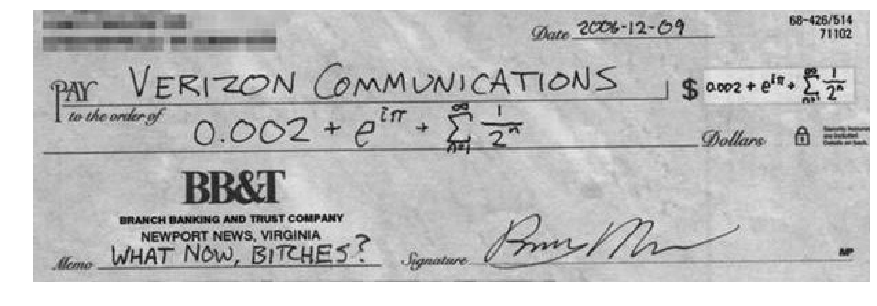

In [0]:
check = cv2.imread('check.jpg' , cv2.IMREAD_GRAYSCALE)
#gray = rgb2gray(check)


plt.figure(figsize=[15,6])
#plt.imshow(gray, cmap='gray')
plt.imshow(check, cmap='gray')
plt.axis('off')
plt.show()

### Grayscale Histogram

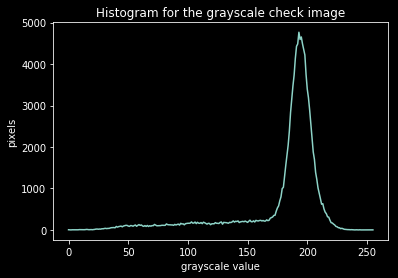

In [0]:
hist = cv2.calcHist([check],[0],None,[256],[0,256])
plt.style.use('dark_background')
plt.plot(hist)
plt.title('Histogram for the grayscale check image')
plt.xlabel('grayscale value')
plt.ylabel('pixels')
plt.show()

### Thresholding

(-0.5, 608.5, 197.5, -0.5)

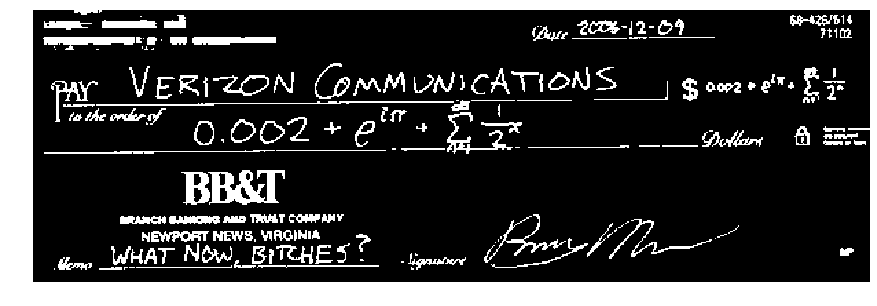

In [0]:
BG = check < 125 #to select the black parts and convert it into white
plt.figure(figsize=[15,6])
plt.imshow(BG, cmap='gray')
plt.axis('off')

(-0.5, 608.5, 197.5, -0.5)

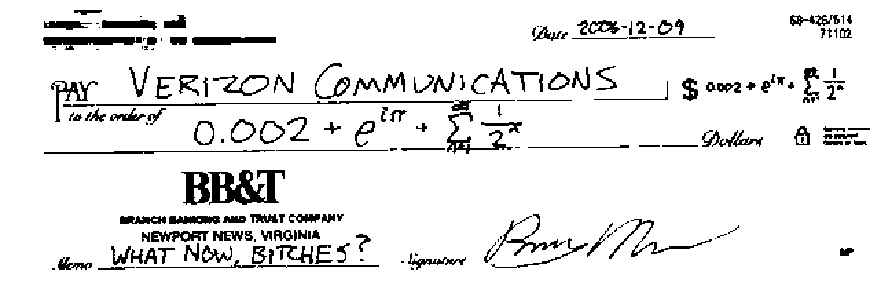

In [0]:
BG = check > 125 #to select the white parts (background) and convert it into white
plt.figure(figsize=[15,6])
plt.imshow(BG, cmap='gray')
plt.axis('off')

# 3d image

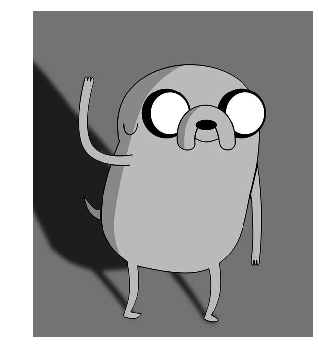

In [0]:
img = cv2.imread('jake2.jpg' , cv2.IMREAD_GRAYSCALE)
#gray = rgb2gray(check)


plt.figure(figsize=[15,6])
#plt.imshow(gray, cmap='gray')
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

### Grayscale Histogram

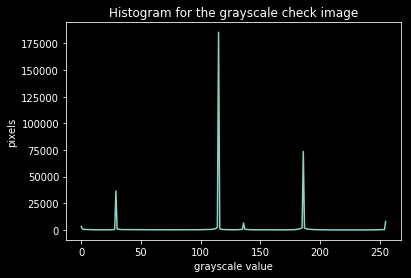

In [0]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])

plt.style.use('dark_background')
plt.plot(hist)
plt.title('Histogram for the grayscale check image')
plt.xlabel('grayscale value')
plt.ylabel('pixels')
plt.show()

### Thresholding

(-0.5, 563.5, 657.5, -0.5)

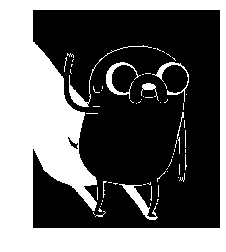

In [0]:
BG = img < 110
plt.imshow(BG, cmap='gray')
plt.axis('off')

(-0.5, 563.5, 657.5, -0.5)

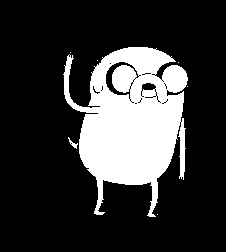

In [0]:
BG = img > 125
plt.imshow(BG, cmap='gray')
plt.axis('off')

### RGB channels

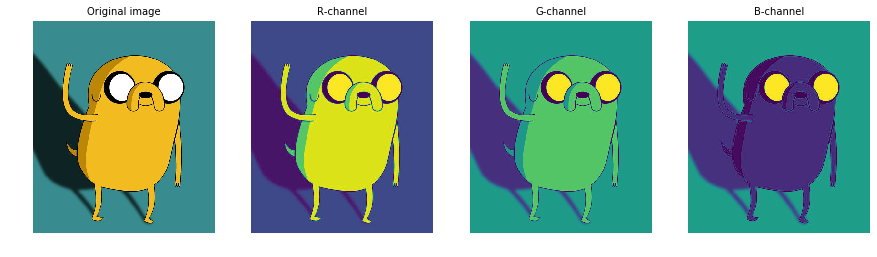

In [0]:
M = cv2.cvtColor(cv2.imread('jake2.jpg'), cv2.COLOR_BGR2RGB)
R,G,B = cv2.split(M)

Imin = np.min(M)
Imax = np.max(M)

plt.figure(figsize=[15,8])
plt.rcParams['axes.titlesize'] = 10
plt.subplot(141)
plt.imshow(M)
plt.axis('off')
plt.title('Original image')
plt.subplot(142)
plt.imshow(R)
plt.axis('off')
plt.title('R-channel')
plt.subplot(143)
plt.imshow(G)
plt.axis('off')
plt.title('G-channel')
plt.subplot(144)
plt.imshow(B)
plt.axis('off')
plt.title('B-channel')
plt.show()

# Normalized Chromaticity Coordinates

In [0]:
crop = cv2.cvtColor(cv2.imread('jake2.jpg'), cv2.COLOR_BGR2RGB)
R1,G1,B1 = cv2.split(crop)
H1 = crop.shape[0]
W1 = crop.shape[1]

spec_R = np.sum(R1)/(H1*W1)
spec_G = np.sum(G1)/(H1*W1)
spec_B = np.sum(B1)/(H1*W1)
denom = spec_R+spec_G+spec_B

N_r = spec_R/denom
N_g = spec_G/denom
N_b = spec_B/denom

print('Normalized chromaticity coordinates')
print('red =',N_r)
print('green =',N_g)
print('blue =',N_b)


#spec_R1 = (R1)/(H1*W1)
#spec_G1 = (G1)/(H1*W1)
#spec_B1 = (B1)/(H1*W1)
#denom = spec_R+spec_G+spec_B

#N_r1 = (spec_R1/denom)
#N_g1 = (spec_G1/denom)
#N_b1 = spec_B1/denom
#plt.plot(N_r1, N_g1)
#plt.title('Normalized chromaticity space')

#cv2.waitKey(0)

Normalized chromaticity coordinates
red = 0.3072144323460865
green = 0.4044432440599664
blue = 0.28834232359394707


# Parametric Segmentation

In [0]:
def division(x,y):
  try:
    return x/y
  except ZeroDivisionError:
    return 0
  
  

# Non-parametric Segementation

# Histogram Backprojection

---
# RESULTS





(-0.5, 563.5, 845.5, -0.5)

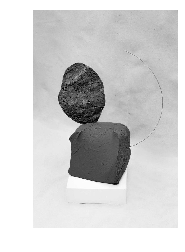

In [0]:
image = cv2.imread('rock.jpg')
image_gray = rgb2gray(image)
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

In [0]:
def circle_points(resolution, center, radius):
    """
    Generate points which define a circle on an image.Centre refers to the centre of the circle
    """   
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T
# Exclude last point because a closed path should not have duplicate points
points = circle_points(200, [80, 250], 80)[:-1]

TypeError: ignored

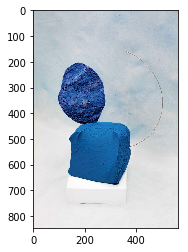

In [0]:
fig, ax = plt.imshow(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)